In [54]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

In [55]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import seaborn as sns

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import nc_time_axis

In [57]:
sns.set(font_scale=1)
sns.set_style("ticks")

In [109]:
data = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/DIC_baseline_ensemble1_ssp126_1m.nc', decode_times=False).sel(deptht=slice(0, 8))

In [110]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
depth = data.variables['deptht'][:]
DIC = data.variables['DIC'][:]

In [111]:
data['time_counter'] = nc.num2date(data['time_counter'][:], data['time_counter'].units)

In [112]:
data['time_counter']

<xarray.DataArray 'time_counter' (time_counter: 1020)>
array([cftime.DatetimeGregorian(2015, 1, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2015, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2015, 3, 16, 12, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2099, 10, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2099, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2099, 12, 16, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
    time_centered  (time_counter) float64 ...
  * time_counter   (time_counter) object 2015-01-16 12:00:00 ... 2099-12-16 1...

In [113]:
sliced_data = data.where((-25 < data.nav_lon) & (data.nav_lon < 10) & (35 < data.nav_lat) & (data.nav_lat < 70), drop=True)

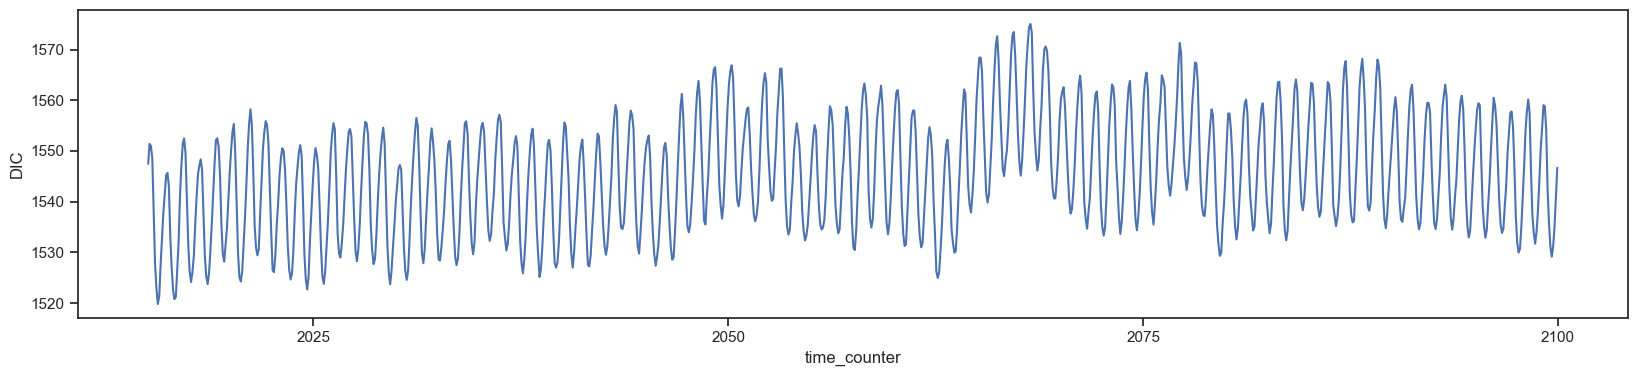

In [114]:
sliced_data.DIC.mean(dim=('y', 'x', 'deptht')).plot(figsize= (20, 4)) # global mean

In [115]:
sliced_frame = sliced_data.sel(time_counter=slice('2090', '2100'))

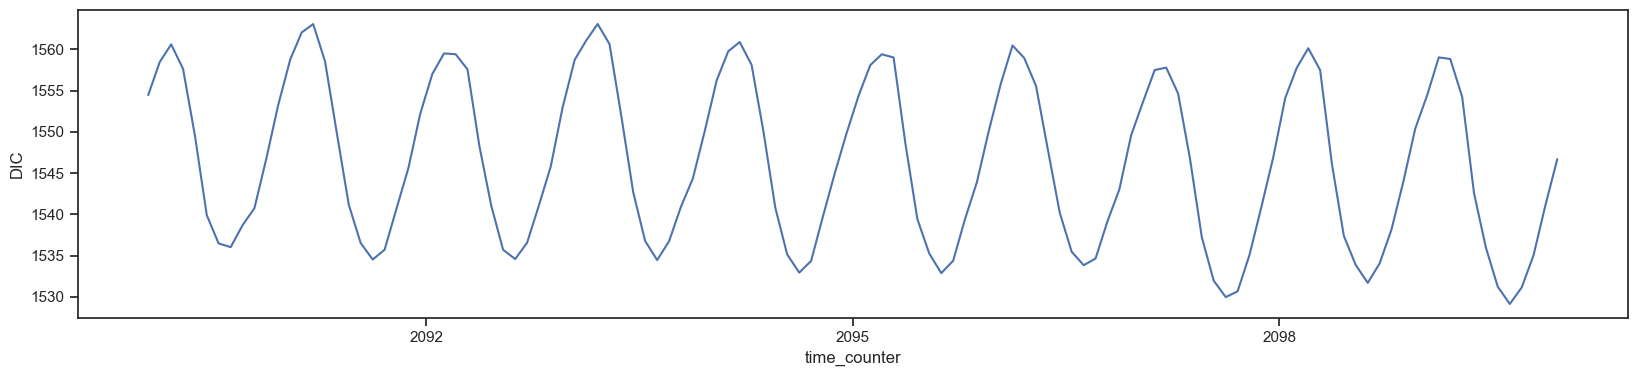

In [116]:
sliced_frame.DIC.mean(dim=('y', 'x', 'deptht')).plot(figsize= (20, 4)) # global mean

In [141]:
# slice timeframe

start_date = "2090-01-01"
end_date = "2100-01-01"

dic_flux = sliced_data["DIC"].sel(time_counter=slice(start_date, end_date))

In [142]:
month_length = dic_flux.time_counter.dt.days_in_month

In [143]:
dic_weighted_mean = ((dic_flux * month_length).resample(time_counter='QS-DEC').sum() / month_length.resample(time_counter='QS-DEC').sum())

In [144]:
dic_weighted_season = dic_weighted_mean.groupby('time_counter').mean(["y", "x", "deptht"])

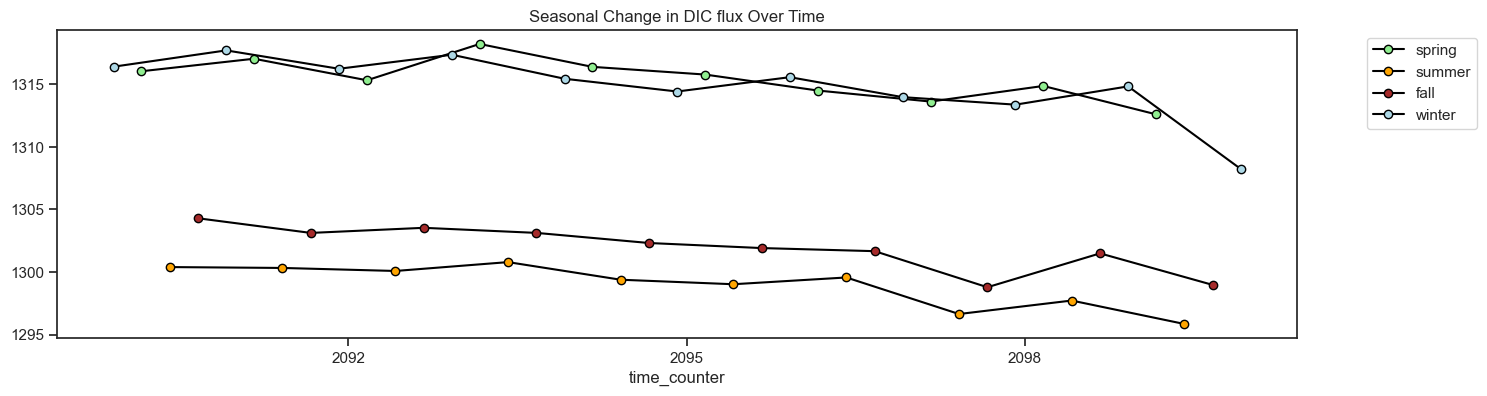

In [145]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in dic_weighted_season.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title = "Seasonal Change in DIC flux Over Time")
plt.show()

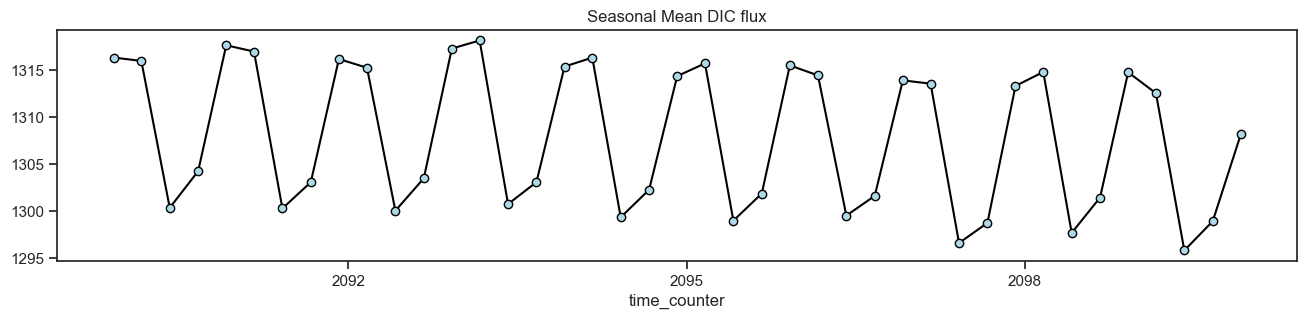

In [146]:
f, ax = plt.subplots(figsize=(16, 3))
dic_weighted_season.plot(marker="o",
                        color="black",
                        markerfacecolor="lightblue",
                        markeredgecolor="black")
ax.set(title="Seasonal Mean DIC flux")
plt.show()

In [147]:
dic_season_summary = dic_flux.groupby('time_counter.season').mean('time_counter', skipna=True)

In [148]:
dic_season_mean_all_years = dic_flux.resample(time_counter='QS-DEC', keep_attrs=True).mean()

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [149]:
dic_seasonal_mean = dic_season_mean_all_years.groupby('time_counter').mean(["y", "x"])

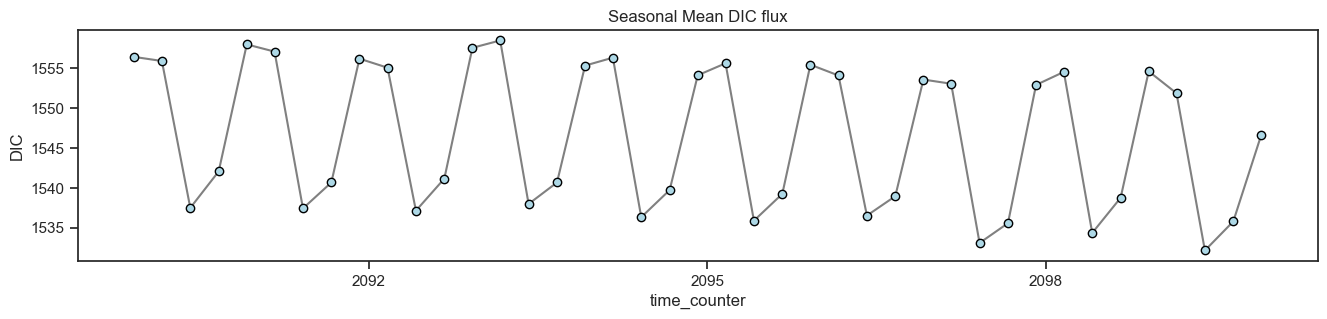

In [150]:
f, ax = plt.subplots(figsize=(16, 3))
dic_seasonal_mean.plot(marker="o",
                        color="grey",
                        markerfacecolor="lightblue",
                        markeredgecolor="black")
ax.set(title="Seasonal Mean DIC flux")
plt.show()

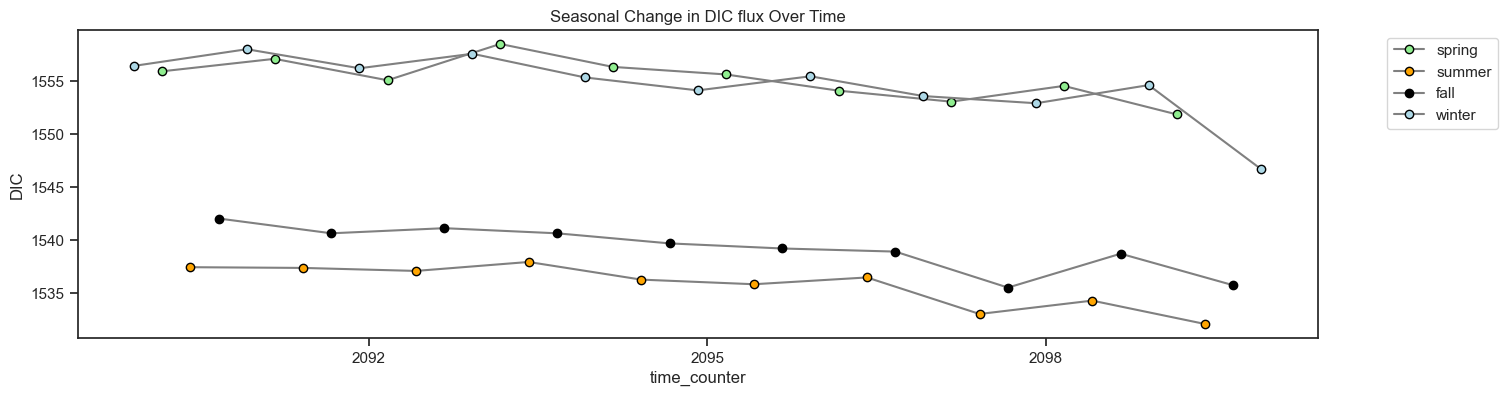

In [151]:
colors = {3: "lightgreen", 6: "orange", 9: "black", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in dic_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="grey",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title="Seasonal Change in DIC flux Over Time")
plt.show()

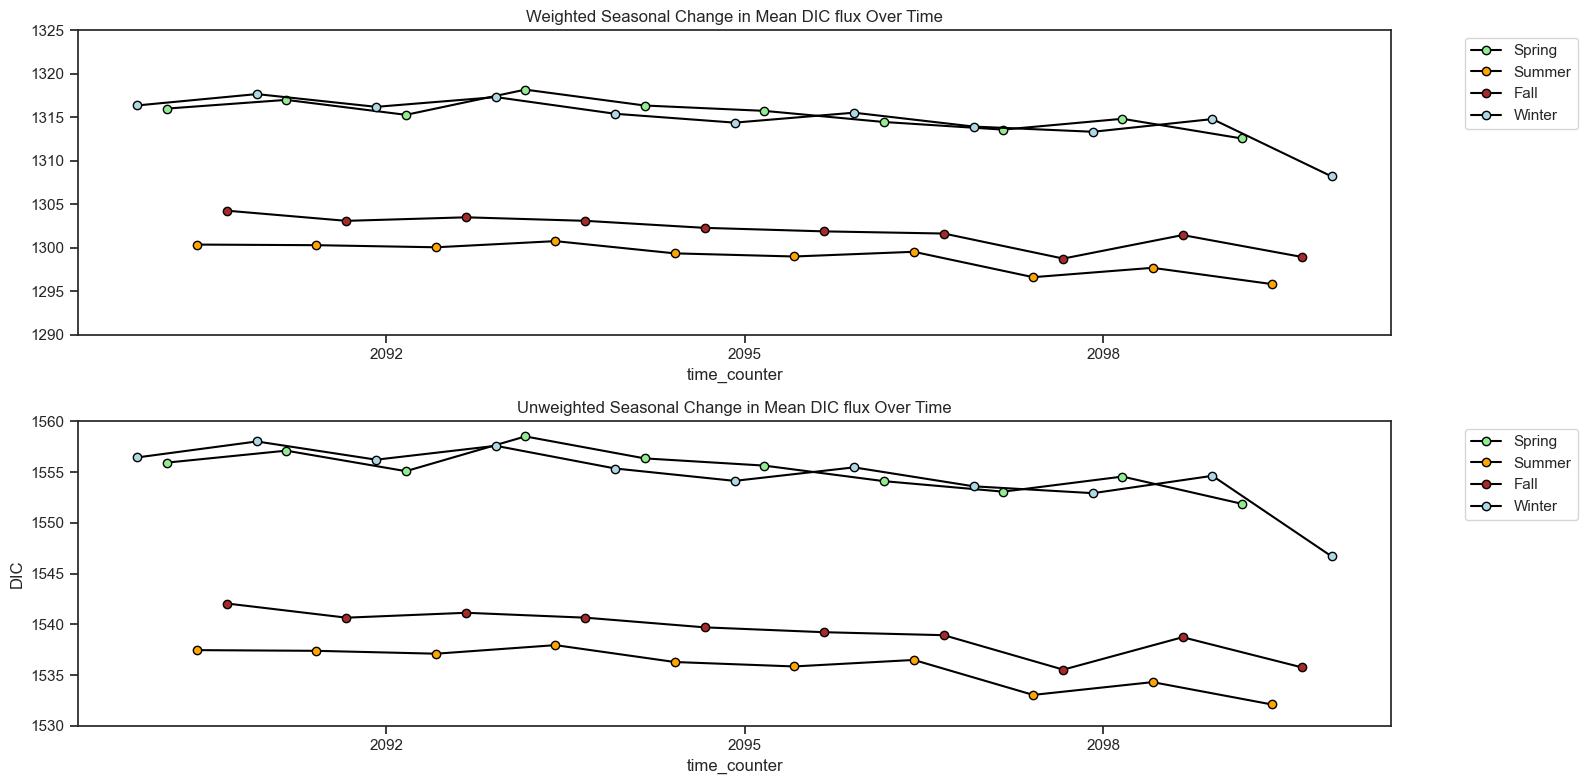

In [174]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in dic_weighted_season.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.set_ylim(1290, 1325)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set(title="Weighted Seasonal Change in Mean DIC flux Over Time")

for month, arr in dic_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.set_ylim(1530, 1560)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set(title="Unweighted Seasonal Change in Mean DIC flux Over Time")

f.tight_layout()
plt.show()